# DIVE INTO CODE COURSE
## Exploratory data analysis Pre-class assignment 1 Analysis of irises
### Doan Anh Tien - 1852789 - tien.doan.g0pr0@hcmut.edu.vn

### \[Problem 1] Data acquisition

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
x = pd.DataFrame(data=iris["data"], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
y = pd.DataFrame(data=iris["target"], columns=['Species'])
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


### \[Problem 2] Combining data

In [4]:
frames = [x, y]
df = pd.concat(frames, axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### \[Problem 3] Checking the data

### 1. Display from beginning to 4th sample

In [5]:
df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


### 2. Output the total number of samples for each label

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


We can look at the non-null count column to see the number of sample for each label.

### 3. Check if there is a missing value in the feature quantity.

In [7]:
df.isnull().sum().any()

False

As we can see, there is no null value (missing value) in this dataframe.

### 4. Display the mean, standard deviation, and quartiles of the feature values at once.

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### \[Problem 4] Examining the iris dataset itself

### Compare the area of each species
Let assume that each flower species will have 2 petal, and 4 sepal. We will calculate the area of each species by combine the area of 4*sepal and one petal, and compare them. Both the sepal and petal have the shape of ellipse, with the area formula is $pi \times width \times length$

In [9]:
import math
mean_df = df.groupby(['Species']).mean()
mean_df

,sepal_length,sepal_width,petal_length,petal_width
Species,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [10]:
area = pd.DataFrame(math.pi*mean_df['sepal_length']*mean_df['sepal_width'] + math.pi*mean_df['petal_length']*mean_df['petal_width'], columns=['Area'])

In [11]:
# area is the new dataframe that contains the area calculated from the above formula
area

,Area
Species,
0,55.041394
1,69.402431
2,96.890060


<AxesSubplot:xlabel='Species'>

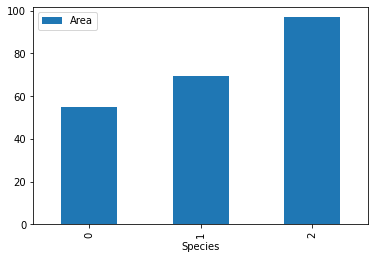

In [12]:
area.plot(kind='bar')

From the dataframe and graph, we can see that species 2 has quite large area of petal and sepal compare to the other two, in which the species 1 is smaller than the species 2, and species 0 is the smallest one.

### \[Problem 5] Extracting the required data

### 1. Extract the sepal_width in 3 different ways

In [13]:
df['sepal_width']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [14]:
df.loc[:,'sepal_width']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [15]:
df.iloc[:,1]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

### 2. Extract the 50th to 99th data

In [16]:
df.iloc[50:99+1]

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


### 3. Extract the 50th to 99th data of the petal_length column

In [17]:
df.iloc[50:99+1, 2]

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal_length, dtype: float64

### 4. Extract data with a petal_width value of 0.2

In [18]:
df.loc[df['petal_width'] == 0.2]

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


### \[Problem 6] Creating a diagram
### Diagram 1

<AxesSubplot:ylabel='Species'>

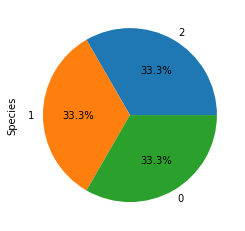

In [19]:
df["Species"].value_counts().plot.pie(autopct="%.1f%%")

The number of sample in each species is equal to each other (50).

### Diagram 2

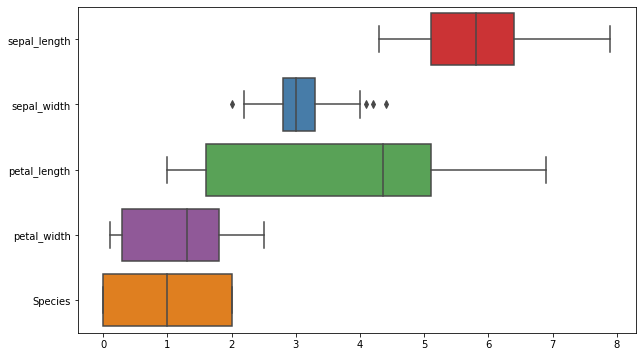

In [20]:
import seaborn as sns
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, orient="h", palette="Set1")

### Diagram 3

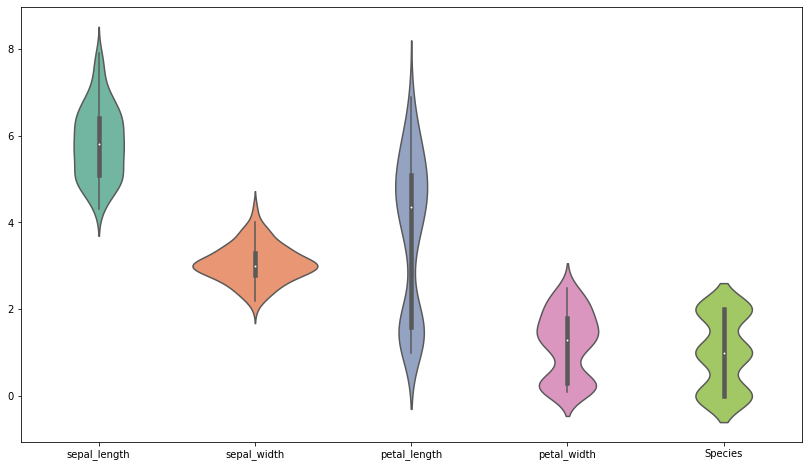

In [21]:
plt.figure(figsize=(14, 8))
ax = sns.violinplot(data=df, orient='v', palette="Set2")

The box plot shows the distribution of quantitative data and other information such as min, max, lower quartile, upper quartile and median. The violon plot is the combination of box plot and the frequency curve (showing which value appears the most in the dataset)

### \[Problem 7] Confirming the relationship between features

In [22]:
specie_0 = df[df.Species == 0]
specie_1 = df[df.Species == 1]
specie_2 = df[df.Species == 2]

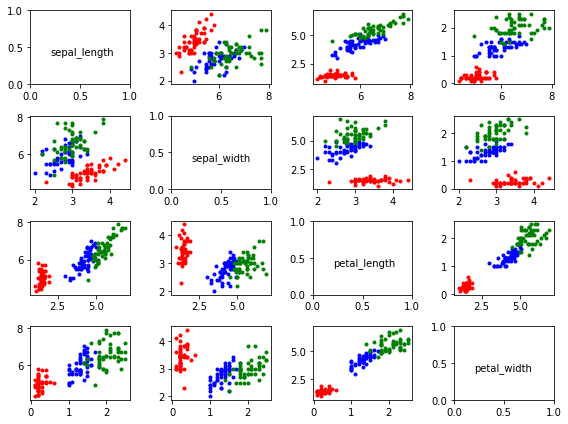

In [23]:
fig, axs = plt.subplots(4, 4, figsize=(8,6))

for i in range(4):
    for j in range(4):
        if (i == j):
            axs[i][j].text(0.2, 0.4, df.columns[i], fontsize=10)
        else:
            axs[i][j].scatter(specie_0.iloc[:,i], specie_0.iloc[:,j], marker='.', color='red')
            axs[i][j].scatter(specie_1.iloc[:,i], specie_1.iloc[:,j], marker='.', color='blue')  
            axs[i][j].scatter(specie_2.iloc[:,i], specie_2.iloc[:,j], marker='.', color='green')

fig.tight_layout()    

In [24]:
feature = df.iloc[:, lambda df: [0,1,2,3]]
matrix = feature.corr(method="pearson")
matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


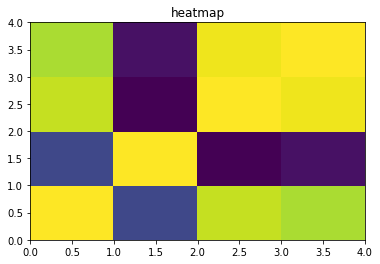

In [25]:
plt.title("heatmap")
plt.pcolor(matrix)
plt.show()

### \[Problem 8] Explaining the results of visualized graphs and tables

From the scatter plot, the species 0 is special for its sepal width which is quite greater than the other two (we can look at the first four subplots).

On contrast, the sepal length of species 2 is larger since its distribution is mostly greater than the species 0 and 1. In summary, when we talk about the sepal's properties, the species 0 is superior in terms of width, and species 0 is superior in terms of length. 

However, we can deny of the fact that species 1 has the sepal width and length evenly distribute, which means its shape its quite nice (I guess)


Then when examining the petal, we can see that species 2 has the largest width and length of petal, followed by the species 1, and lastly the species 0 which has the smallest size of petal.